In [4]:
# %load ../Visualize_R2.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

colors = np.array(['blue','green','red','violet','cyan',\
                    'magenta','yellow','black','orange'])
marker_size = 75
marker_alpha = 0.50

def make_R2_plot(df_merged,df_centroid):
    grouped = df_merged.groupby('iteration')
    centroids = df_centroid.groupby('iteration')

    ncols=2
    nrows = int(np.ceil(grouped.ngroups/ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, \
        figsize=(10*ncols,10*nrows))

    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        df = grouped.get_group(key)
        df_cent = centroids.get_group(key)
        ax.set_title("iteration: "+str(key))
        ax.scatter(x =df['0'],y = df['1'],c = df.color.values, s=marker_size, \
            alpha=marker_alpha)
        ax.scatter(x = df_cent.x_1, y = df_cent.x_2, c = df_cent.color.values, \
            s=marker_size,edgecolor='black',linewidths=3)
    plt.show()


def load_file(points_file, assignment_file, centroid_file):
    df_points = pd.read_csv(points_file)
    df_points = df_points.drop(['Unnamed: 0'], axis=1)
    df_ASSIGNMENTS =  pd.read_csv(assignment_file)
    df_CENTROIDS =  pd.read_csv(centroid_file)
    print(df_points.columns)
    df_ASSIGNMENTS = df_ASSIGNMENTS.drop('Unnamed: 0',axis=1)
    df_CENTROIDS = df_CENTROIDS.drop('Unnamed: 0',axis=1)

    df_CENTROIDS['iteration']=df_CENTROIDS['iteration'].astype('int')
    df_CENTROIDS['index']= df_CENTROIDS['index'].astype('int')

    df_CENTROIDS['color'] = colors[df_CENTROIDS['index']]
    df_MERGE = df_points.merge(df_ASSIGNMENTS,left_on = ['ID'],right_on=['P_i'])
    df_MERGE['color'] = colors[df_MERGE['C_j']]

    return (df_MERGE, df_CENTROIDS)


In [5]:
points = "500Points.csv"
assignment = "500Points_Assignment_INF_NORM.csv"
centroid = "500PointsCentroid_INF_NORM.csv"

In [8]:
(df_Merge, df_Centroid) = load_file(points, assignment, centroid)

Index(['0', '1', 'cluster', 'KMeans', 'ID'], dtype='object')


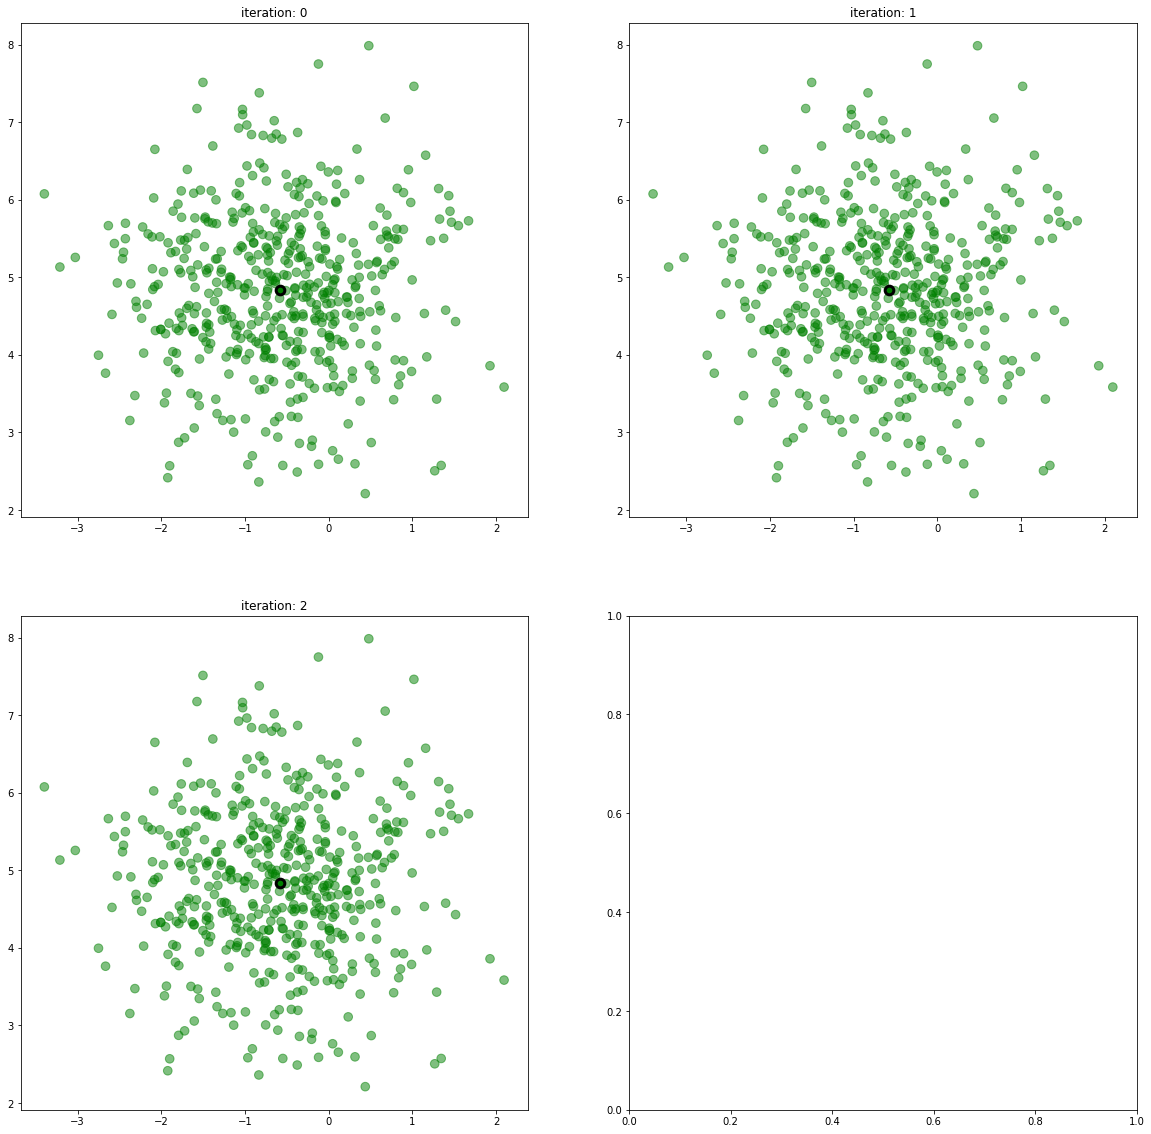

In [9]:
make_R2_plot(df_Merge,df_Centroid)